# Life Expectancy and GDP Data Analysis project

In this survey we will compare GDP and life expectancy in different countries and answer questions of our research which are: <br>
- Do countries have significantly different life expectancy and GDP, if yes, then how so?
- Is there some relationship between life expectancy and GDP?
- If there is some sort of relationship between life expectancy and GDP, how it differs bitween countries?

First and foremost lets import all necessary libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lets read our dataset and get basic sense of given data

In [11]:
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())
print(df.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
co

As we see we have four columns: Country, Year, Life expectancy at birth (years) and GDP. <br> Every column contains 96 non-null values and every line contains single observation. From that two facts we can conclude that data is pretty clear and begin our analysis. <br> Next step would be column renaming.

In [12]:
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': \
                        'life_expectancy', 'GDP':'gdp'})
print(df.columns)

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')


To get some insight on data distribution lets build some boxplots.

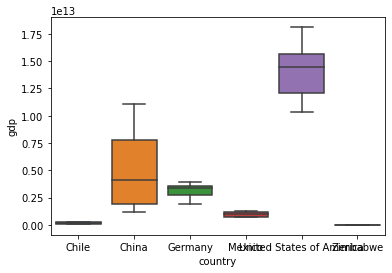

In [13]:
sns.boxplot(data = df, x = 'country', y = 'gdp')
plt.show()

From that graph it's obvious that we have the problem with outlying **GDP** of USA, so lets work it out. 

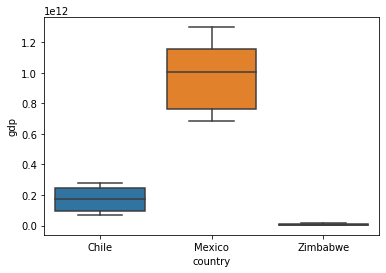

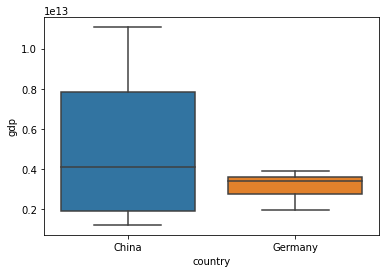

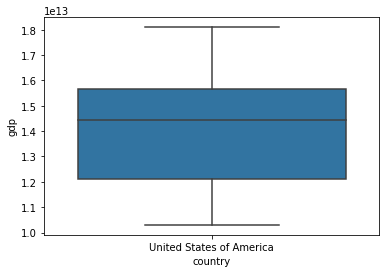

In [28]:
high_gdp = df[df.country.isin(['United States of America'])]
medium_gdp = df[df.country.isin(['China', 'Germany'])]
low_gdp = df[df.country.isin(['Chile', 'Mexico', 'Zimbabwe'])]

sns.boxplot(data = low_gdp, x = 'country', y = 'gdp')
plt.show()

sns.boxplot(data = medium_gdp, x = 'country', y = 'gdp')
plt.show()

sns.boxplot(data = high_gdp, x = 'country', y = 'gdp')
plt.show()

From this three graphs is clear that order in countries **GDP** is:
1. USA
2. China
3. Germany
4. Mexico
5. Chile
6. Zimbabwe

So now lets dive deep into answering the question about relationship between **life expectancy**.

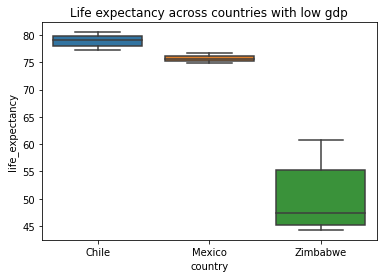

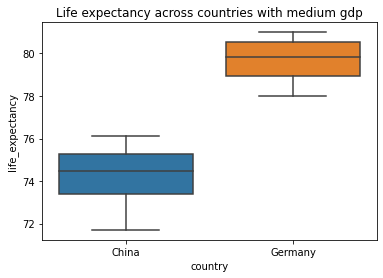

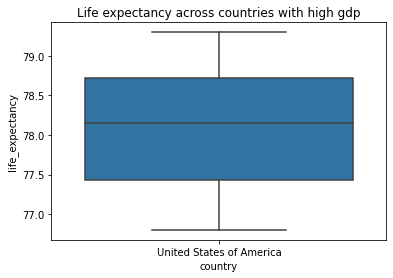

In [48]:
sns.boxplot(data = low_gdp, x = 'country', y = 'life_expectancy')
plt.title('Life expectancy across countries with low gdp')
plt.show()

sns.boxplot(data = medium_gdp, x = 'country', y = 'life_expectancy')
plt.title('Life expectancy across countries with medium gdp')
plt.show()

sns.boxplot(data = high_gdp, x = 'country', y = 'life_expectancy')
plt.title('Life expectancy across countries with high gdp')
plt.show()

From this graphs we can form our top for **life expectancy**.
1. Chile
2. Germany
3. USA
4. Mexico
5. China
6. Zimbabwe

It's interesting that this top is different from gdp. <br>
Finally we are looking forward to find sone sort of relationship between this two variables.

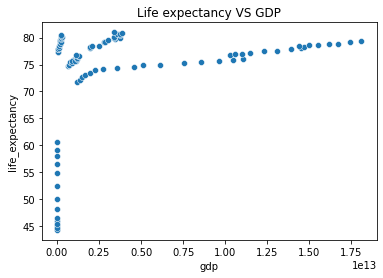

In [31]:
sns.scatterplot(data = df, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy')
plt.show()

We need to normalize our data across **GDP** axis to get better insight.

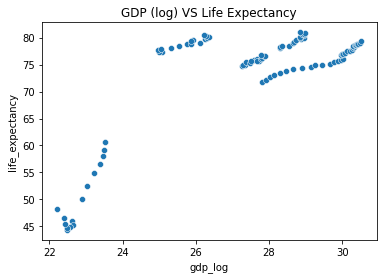

In [32]:
df['gdp_log'] = np.log(df.gdp)
sns.scatterplot(data = df, x = 'gdp_log', y = 'life_expectancy')
plt.title('GDP(log) vs Life Expectancy')
plt.show()

As we see from the graph we have something that looks like linear regression here. <br>
So lets research relationship between this two variables a bit further.

In [36]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, pval = pearsonr(df.gdp, df.life_expectancy)
spearman_corr, pval = spearmanr(df.gdp, df.life_expectancy)
print(pearson_corr, spearman_corr)

0.343206748449156 0.4472391846883402


From Pearsons' and Spearmans' coefficients we can conclude that positive relationship exists but it's not so strong due to huge gap in countries **life expectancies**. <br> Now lets look on every country group in detail.

0.5179480641465105 0.5404994698558423


Text(0.5, 1.0, 'GDP VS Life Expectancy (low GDP)')

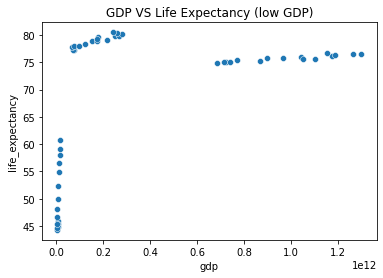

In [39]:
pearson_corr_low_gdp, _ = pearsonr(low_gdp.gdp, low_gdp.life_expectancy)
spearman_corr_low_gdp, _ = spearmanr(low_gdp.gdp, low_gdp.life_expectancy)
print(pearson_corr_low_gdp, spearman_corr_low_gdp)

sns.scatterplot(data = low_gdp, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy (low GDP)')

As we can see from graph above there are three clusters of points. <br>
Let's research every country (Mexico, Chile, Zimbabwe) in deep.

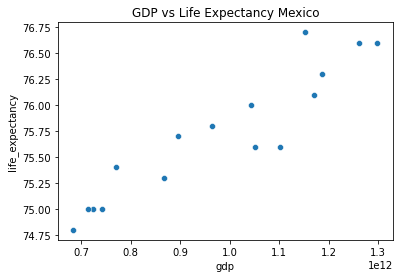

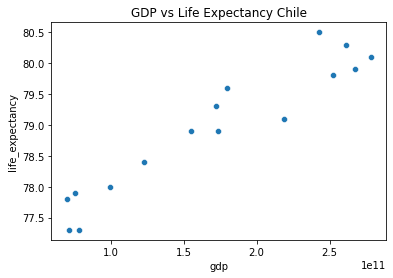

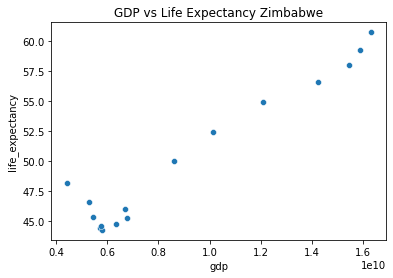

In [43]:
mexico = df[df.country == 'Mexico']
sns.scatterplot(data = mexico, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy Mexico')
plt.show()

chile = df[df.country == 'Chile']
sns.scatterplot(data = chile, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy Chile')
plt.show()

zimbabwe = df[df.country == 'Zimbabwe']
sns.scatterplot(data = zimbabwe, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy Zimbabwe')
plt.show()

-0.03438347950741802 0.3114288345954838


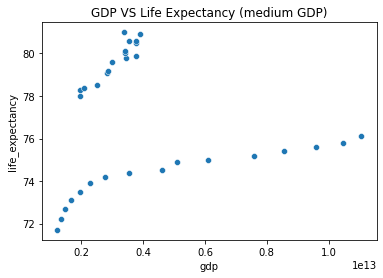

In [40]:
pearson_corr_med_gdp, _ = pearsonr(medium_gdp.gdp, medium_gdp.life_expectancy)
spearman_corr_med_gdp, _ = spearmanr(medium_gdp.gdp, medium_gdp.life_expectancy)
print(pearson_corr_med_gdp, spearman_corr_med_gdp)

sns.scatterplot(data = medium_gdp, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy (medium GDP)')
plt.show()

As we see on graph above there're two clusters of points. <br>Let's research it in deep for both China and Germany.

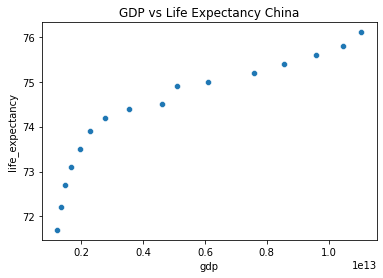

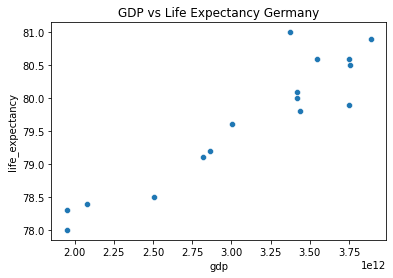

In [42]:
china = df[df.country == 'China']
sns.scatterplot(data = china, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy China')
plt.show()

germany = df[df.country == 'Germany']
sns.scatterplot(data = germany, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy Germany')
plt.show()


In conclusion let's look on USAs' graph.

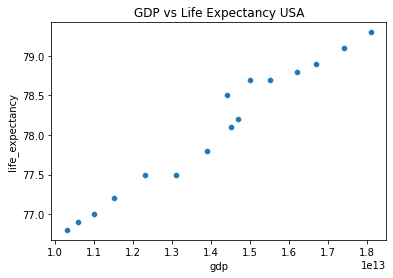

In [44]:
usa = df[df.country == 'United States of America']
sns.scatterplot(data = usa, x = 'gdp', y = 'life_expectancy')
plt.title('GDP vs Life Expectancy USA')
plt.show()

**To sum up I would like to say that in every country we can observe strong positive correlation between life expectancy and GDP, but for every country slope of hypothetical regression line is different. Also as we seen higher gdp doesn't always means higher life expectancy. But if country is poor there's large chanse that life expectancy would be lower**